<a href="https://colab.research.google.com/github/adityaghai07/ML-Projects/blob/main/Makemore_Indie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Name Generator using Bigram + Simple Neural Network

Based on [Andrej Karpathy’s nn-zero-to-hero Makemore Project](https://github.com/karpathy/nn-zero-to-hero), this project builds a simple neural network to learn and generate Indian names character-by-character using bigram-based context.

## 📥 Dataset

Used an external dataset of Indian names:  
[Indian-Male-Names.csv](https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv)

## ⚙️ Approach

- Collected character-level bigrams from names.
- Mapped characters to integers for numerical processing.

## 🧠 Model

- Input: Bigram character pair
- Layers: Linear → Softmax
- Output: Probability distribution over next characters (softmax)

## 🔮 Generation

Once trained, the model generates new Indian-style names by sampling characters iteratively until a stop token is reached.

## 🙏 Acknowledgements

Inspired by [nn-zero-to-hero](https://github.com/karpathy/nn-zero-to-hero) by **Andrej Karpathy**.  
Dataset from a [gist by mbejda](https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63).


In [ ]:
import pandas as pd
import re

url = "https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv"


df = pd.read_csv(url)

df = df.dropna(subset=["name"])


first_names = df["name"].apply(lambda x: str(x).split()[0].lower())
words = [name for name in first_names if re.fullmatch(r'[a-z]+', name)]

print(words[:10])


In [62]:
words[:6]

['barjraj', 'ramdin', 'sharat', 'birender', 'amit', 'kushal']

In [63]:
len(words)

14486

In [64]:
min(len(word) for word in words)

1

In [65]:
max(len(word) for word in words)

19

In [66]:
words[0]

'barjraj'

In [67]:

b ={}
for w in words:
  chs =['<S>'] + list(w) + ['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) +1
    # print(ch1,ch2)

In [68]:
sorted(b.items(), key = lambda  kv : -kv[1])

[(('s', 'h'), 3422),
 (('a', 'n'), 3303),
 (('r', 'a'), 3041),
 (('<S>', 's'), 2587),
 (('h', '<E>'), 1971),
 (('<S>', 'r'), 1930),
 (('h', 'a'), 1878),
 (('<S>', 'a'), 1853),
 (('a', 'r'), 1734),
 (('n', '<E>'), 1697),
 (('r', '<E>'), 1551),
 (('a', 'm'), 1531),
 (('d', 'e'), 1366),
 (('l', '<E>'), 1326),
 (('<S>', 'm'), 1322),
 (('e', 'e'), 1284),
 (('n', 'd'), 1275),
 (('a', 'j'), 1195),
 (('s', 'a'), 1168),
 (('m', 'a'), 1159),
 (('t', '<E>'), 1104),
 (('v', 'i'), 1049),
 (('e', 's'), 1040),
 (('e', 'r'), 967),
 (('h', 'i'), 957),
 (('m', '<E>'), 938),
 (('a', 'l'), 909),
 (('i', 'n'), 884),
 (('i', 't'), 883),
 (('a', 's'), 879),
 (('j', 'a'), 872),
 (('p', 'a'), 851),
 (('i', 's'), 847),
 (('<S>', 'p'), 816),
 (('<S>', 'v'), 807),
 (('u', '<E>'), 793),
 (('<S>', 'd'), 791),
 (('d', '<E>'), 783),
 (('k', 'a'), 780),
 (('e', 'n'), 775),
 (('s', 'u'), 763),
 (('n', 'a'), 712),
 (('a', 'k'), 696),
 (('a', '<E>'), 695),
 (('<S>', 'k'), 678),
 (('i', '<E>'), 647),
 (('n', 'i'), 643),
 

In [71]:
import torch

In [72]:
a = torch.zeros((3,5))
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [73]:
a.dtype
a[1,3] = 1

In [74]:
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]])

In [75]:
N = torch.zeros((27,27), dtype=torch.int32)


In [37]:
#now instead of a dictionary, we shall store stuff in our tensor. For that we also need a look-up table.
# mapping int to alphabets

In [69]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}

In [70]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [76]:
# stoi['<S>'] = 26
# stoi['<E>'] = 27

stoi['.'] = 0

In [77]:

for w in words:
  chs =['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2]+=1

    # print(ch1,ch2)

In [78]:
N

tensor([[   0, 1853,  617,  230,  791,   12,   85,  424,  356,  153,  471,  678,
          234, 1322,  601,   86,  816,    0, 1930, 2587,  194,   90,  807,   27,
            0,  103,   19],
        [ 695,  167,  415,   83,  402,   10,   65,  211,  536,  231, 1195,  696,
          909, 1531, 3303,    1,   96,   10, 1734,  879,  503,  154,  520,  141,
           45,  595,   75],
        [ 116,  320,   20,    1,   44,   34,    0,    0,  498,  218,    5,    0,
           31,    0,    0,   31,    1,    0,   48,    0,    0,   87,    0,    0,
            0,   10,    0],
        [   1,    1,    0,    6,    0,   16,    0,    0,  399,    0,    0,   46,
            0,    0,    0,    2,    0,    0,    0,    0,    5,    1,    0,    0,
            0,    0,    0],
        [ 783,  279,    1,    0,   96, 1366,    0,    0,  335,  335,    0,    2,
            0,    3,    4,   12,    3,    0,  204,    3,    1,  124,    1,    3,
            0,    9,    0],
        [ 101,    2,    8,    1,   62, 1284,    3,

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

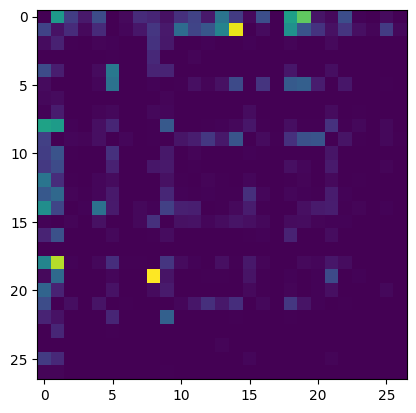

In [80]:
plt.imshow(N)

In [81]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

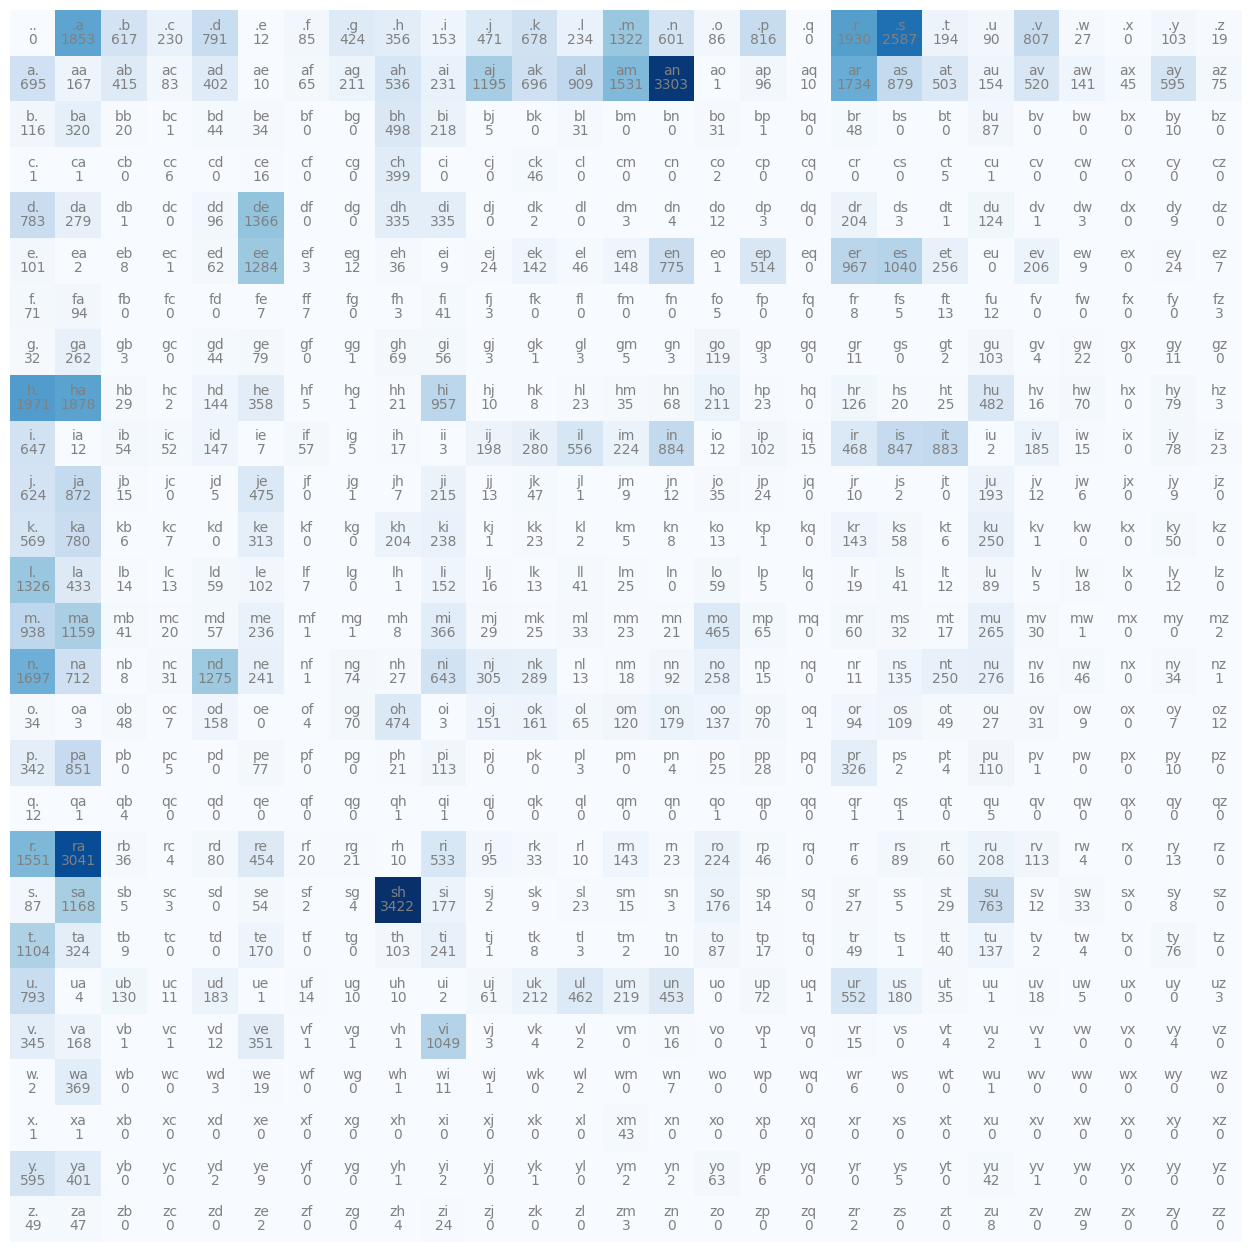

In [82]:
#for better visualization!

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
    plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')
plt.axis('off')

In [ ]:
#All info to start sampling!

In [83]:
N[0,:]

tensor([   0, 1853,  617,  230,  791,   12,   85,  424,  356,  153,  471,  678,
         234, 1322,  601,   86,  816,    0, 1930, 2587,  194,   90,  807,   27,
           0,  103,   19], dtype=torch.int32)

In [84]:
p = N[0].float()
p = p/p.sum()
p.sum()

#Normal probability distribution!

tensor(1.)

In [85]:
# Torch multinomial(for sampling) + generator ( for being deterministic)

In [188]:
import torch

g = torch.Generator().manual_seed(123456789)
p = torch.rand(3, generator=g)
p = p / p.sum()
print(p)


tensor([0.2315, 0.3463, 0.4222])


In [190]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1])

In [191]:
p = N[0].float()
p = p/p.sum()
p.sum()


g = torch.Generator().manual_seed(123456789)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'r'

In [193]:
# make a loop and start predicting!
# g = torch.Generator().manual_seed(123456789)

for i in range(10):
  out = []
  ix = 0
  while True:
    p = N[ix].float()
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    # print(itos[ix])
    out.append(itos[ix])
    if ix == 0:
      break


  print(''.join(out))

rabivay.
dh.
u.
kan.
araj.
inishishanak.
ra.
r.
gararam.
shnura.


In [194]:
#efficiency! already save the probabilities.

P = (N+1).float()
P.sum(1,keepdim=True)
P = P / P.sum(1,keepdim=True)
P

tensor([[6.8904e-05, 1.2775e-01, 4.2583e-02, 1.5917e-02, 5.4572e-02, 8.9575e-04,
         5.9257e-03, 2.9284e-02, 2.4599e-02, 1.0611e-02, 3.2523e-02, 4.6786e-02,
         1.6192e-02, 9.1160e-02, 4.1480e-02, 5.9946e-03, 5.6294e-02, 6.8904e-05,
         1.3305e-01, 1.7832e-01, 1.3436e-02, 6.2702e-03, 5.5674e-02, 1.9293e-03,
         6.8904e-05, 7.1660e-03, 1.3781e-03],
        [4.5702e-02, 1.1032e-02, 2.7316e-02, 5.5158e-03, 2.6463e-02, 7.2231e-04,
         4.3338e-03, 1.3921e-02, 3.5262e-02, 1.5234e-02, 7.8534e-02, 4.5768e-02,
         5.9754e-02, 1.0060e-01, 2.1695e-01, 1.3133e-04, 6.3694e-03, 7.2231e-04,
         1.1393e-01, 5.7784e-02, 3.3095e-02, 1.0178e-02, 3.4211e-02, 9.3243e-03,
         3.0206e-03, 3.9136e-02, 4.9905e-03],
        [7.8471e-02, 2.1529e-01, 1.4085e-02, 1.3414e-03, 3.0181e-02, 2.3474e-02,
         6.7069e-04, 6.7069e-04, 3.3467e-01, 1.4688e-01, 4.0241e-03, 6.7069e-04,
         2.1462e-02, 6.7069e-04, 6.7069e-04, 2.1462e-02, 1.3414e-03, 6.7069e-04,
         3.2864e-

In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [195]:
# g = torch.Generator().manual_seed(123456789)

for i in range(10):
  out = []
  ix = 0
  while True:
    p = N[ix].float()
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(itos[ix])
    if ix == 0:
      break


  print(''.join(out))

aderajingairak.
mamit.
sohampan.
mal.
sterubanevirajajeep.
j.
maram.
a.
aminoh.
dukamisujinim.


In [196]:
log_likelihood = 0.0
n = 0

# for w in words:
for w in ["qwertyujq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-43.2311)
nll=tensor(43.2311)
4.323105335235596


In [ ]:
#Thinking about neural networks!!!!

In [ ]:
#Training set with bigrams!

In [197]:
xs, ys = [], []

for w in words[:1]:
  print(f'the name is : {w}')
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1,ch2)
    xs.append(ix1)
    ys.append(ix2)


xs = torch.tensor(xs)
ys = torch.tensor(ys)
nums = xs.nelement()
# print(xs.shape,ys.shape)

the name is : barjraj
. b
b a
a r
r j
j r
r a
a j
j .


In [198]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()

In [199]:
xenc.shape

torch.Size([8, 27])

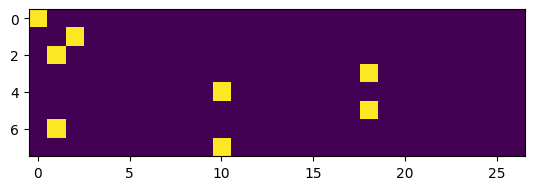

In [200]:
plt.imshow(xenc)

In [201]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(123456789)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [202]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
nums = xs.nelement()
print('number of examples: ', nums)

# initialize the 'network'
# g = torch.Generator().manual_seed(123456789)
W = torch.randn((27, 27), requires_grad=True)

number of examples:  98785


In [204]:
# gradient descent
for k in range(100):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(nums), ys].log().mean() + 0.01*(W**2).mean()
  if k % 10 == 0:
    print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -5 * W.grad

2.413334608078003
2.3930435180664062
2.3760673999786377
2.3616554737091064
2.3492684364318848
2.3385093212127686
2.3290791511535645
2.320749521255493
2.3133413791656494
2.306715250015259


In [205]:
#sampling from the neural network!

for k in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdims=True)

    ix = torch.multinomial(probs, num_samples=1, replacement=True).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

ban.
t.
sharcy.
nenand.
vchamunj.


### Yay! The project is complete! Though the tutorial was only 2 hours long, it took me quite sometime to follow it along with the code. Got so much to learn!

You can chat with me here [LinkedIn](https://www.linkedin.com/in/aditya-ghai/)